In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import np_utils

In [57]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [58]:
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print(y_train)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
[9 0 0 ... 3 0 5]


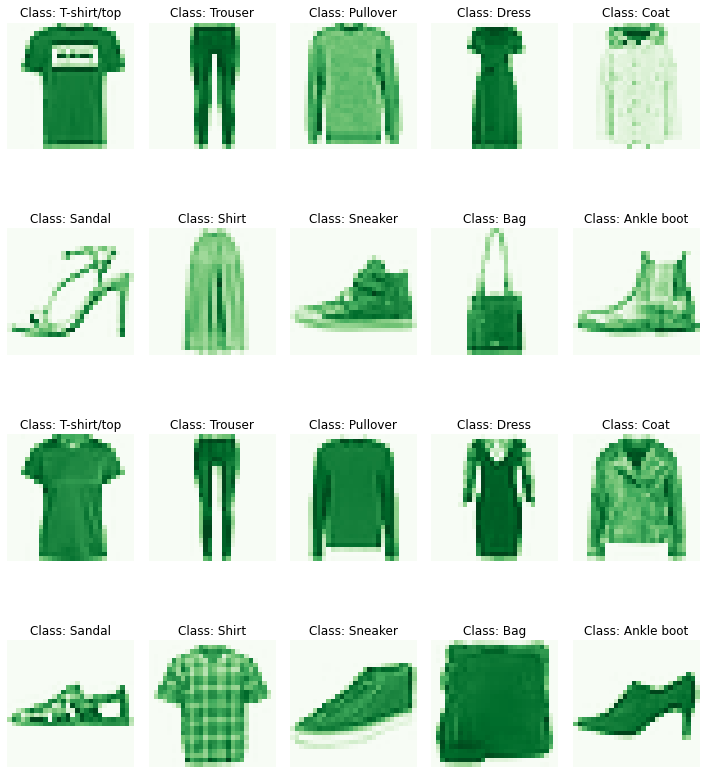

In [59]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig = plt.figure(figsize=(10,12))

for i in range(20):
    plt.subplot(4,5,i+1)
    img = X_train[y_train == (i%10)][i%10+i]
    plt.imshow(img, cmap='Greens', interpolation='none')
    plt.title("Class: {}".format(class_names[i%10]))
    plt.axis('off')
    
plt.tight_layout()

In [60]:
from sklearn.preprocessing import StandardScaler

#Preparing the Data
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = np.insert(X_train, X_train.shape[1], 1, axis=1)
X_test = np.insert(X_test, X_test.shape[1], 1, axis=1)

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)


scaler= StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test /= 255

Training matrix shape (60000, 785)
Testing matrix shape (10000, 785)


In [61]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices using one-hot encoding
num_classes = 10 # There are 10 classes possible 
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [62]:
from random import seed
from random import random
from numpy import random
 
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs, n_layers):
    network = list()
    for i in range(n_layers):
        if i==0:
            hidden_layer = [{'weights':[random.rand()*0.01 for i in range(n_inputs + 1)]} for i in range(n_hidden)]
        else:
            hidden_layer = [{'weights':[random.rand()*0.01 for i in range(n_hidden + 1)]} for i in range(n_hidden)]
        network.append(hidden_layer)
    output_layer = [{'weights':[random.rand()*0.01 for i in range(n_hidden+1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network
 
seed(1)
no_of_inputs=784
no_of_neurons_in_hidden_layer=5
no_of_classes=10
no_of_layers=1
network = initialize_network(no_of_inputs, no_of_neurons_in_hidden_layer, no_of_classes, no_of_layers)
for layer in network:
    print(layer)
    print("\n")

[{'weights': [0.005103817957449438, 0.0021903832023162486, 0.0018392196902635072, 0.00423199834411888, 0.00804532825003257, 0.009889886247030367, 0.00780280744060157, 0.005517220559305556, 0.007154762053602071, 0.008417502977699729, 0.008739748515057795, 0.0071801000602057345, 0.00015177673586843187, 0.008523987593961594, 0.004200351177663834, 0.002685721845564375, 0.009387720981570565, 0.009676958939738623, 0.0023840633573960534, 0.004623685948469204, 0.0009573252807207367, 0.002252140726004811, 0.0015671390770088346, 0.009546084727779217, 0.0006391063293000022, 0.00434818665600099, 0.0013774094327975727, 0.004257460080942663, 0.004468297392219945, 0.0024359117524697716, 0.002133069723277037, 0.006262174024545362, 0.00965259817269963, 0.003538988428655957, 0.0033282880374529045, 0.005772845010416301, 0.007840301415315202, 0.0033620664193665197, 0.001967632906318797, 0.009713438198236625, 0.004421851354793105, 0.0026763713608232544, 0.006531505719101037, 0.003339361182364714, 0.0061492

In [63]:
from math import exp

# Calculate neuron activation for an input
def activate(weights, inputs,enni):
    bias = weights[-1]
    activation=np.dot(inputs, weights)
    activation+=bias
    return activation
 
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

# Softmax function
def softmax(x):
    mx=np.max(x)
    x=x-mx
    return np.exp(x)/np.sum(np.exp(x))
 
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    j=0
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs,j)
            if j!=no_of_layers:
                neuron['output'] = transfer(activation)
                new_inputs.append(neuron['output'])
            else:
                new_inputs.append(activation)
#         new_inputs.append(1)
#         j+=1
        
        if j==no_of_layers:
            neuron['output'] = softmax(new_inputs)
            new_inputs=[]
            new_inputs.append(neuron['output'])
        else:
            new_inputs.append(1)
            j+=1
        
        print(new_inputs)
        print("\n")
        inputs=new_inputs
    return inputs
 
output=[]
for i in range(100):
    output=forward_propagate(network,X_train[i])
    max_val,ind=-1,-1
    for i in range(len(output[0])):
        if output[0][i]>max_val:
            max_val=output[0][i]
            ind=i
#     print(ind,output)
    print("\n")

[0.7843622277120033, 0.7797766936239102, 0.7721362998150231, 0.7890997655568883, 0.7740314904643854, 1]


[array([0.10048462, 0.10004405, 0.10001554, 0.0999086 , 0.0996941 ,
       0.1004453 , 0.10051014, 0.09974676, 0.1001589 , 0.09899197])]




[0.8479691636762462, 0.8408505124398987, 0.8358467308845868, 0.8501557005051892, 0.8246058645619222, 1]


[array([0.10048656, 0.09999659, 0.10004517, 0.09987566, 0.09973163,
       0.10045136, 0.10055207, 0.0997005 , 0.10015617, 0.09900427])]




[0.131800775968418, 0.13634791412212177, 0.14899214549765935, 0.14165614699948006, 0.13144355275179243, 1]


[array([0.10050304, 0.10053968, 0.09969684, 0.10031066, 0.09924062,
       0.10042387, 0.10012385, 0.10021312, 0.10012887, 0.09881945])]




[0.32692981811338817, 0.3367439696080292, 0.3325102753234319, 0.3275351457657335, 0.3309355923922338, 1]


[array([0.10049717, 0.1003907 , 0.09979719, 0.10018819, 0.09938349,
       0.10042152, 0.1002349 , 0.10007632, 0.10013567, 0.09887484])]




[0.52674

In [64]:
class Layer:
    
    def __init__(self, inputDimension, noOfNeurons, activation='', randomMultiplier=0.01):
        self.weights, self.bias = self.initialize(inputDimension, noOfNeurons, randomMultiplier)
        if activation == 'sigmoid':
            self.activation = activation
            self.activationForward = self.sigmoid
            self.activationBackward = self.sigmoidGrad
        elif activation == 'softmax':
            self.activation = activation
            self.activationForward = self.softmax
            self.activationBackward = self.softmaxGrad
        else:
            self.activation = 'none'
            self.activationForward = self.linear
            self.activationBackward = self.linear
    
    def initialize(self, nx, noOfNeurons, randomMultiplier):
        weights = randomMultiplier * np.random.randn(noOfNeurons, nx)
        bias = np.zeros([noOfNeurons, 1])
        return weights, bias

    def linear(self, Z):
        return Z        
    
    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)
   
    def softmaxGrad(self, dA):
        exp_shifted = np.exp(self.prevZ - self.prevZ.max())
        return dA * (exp_shifted / np.sum(exp_shifted, axis = 0)) * (1 - exp_shifted / np.sum(exp_shifted, axis = 0))

    def sigmoid(self, Z):
        A = 1 / (1 + np.exp(-Z))
        return A
        
    def sigmoidGrad(self, dA):
        s = 1 / (1 + np.exp(-self.prevZ))
        dZ = dA * s * (1 - s)
        return dZ
    
    def forward(self, A):
        Z = np.dot(self.weights, A) + self.bias
        self.prevZ = Z
        self.prevA = A
        A = self.activationForward(Z)
        return A
    
    def backward(self, dA):
        dZ = self.activationBackward(dA)
        m = self.prevA.shape[1]
        self.dW = 1 / m * np.dot(dZ, self.prevA.T)
        self.db = 1 / m * np.sum(dZ, axis=1, keepdims=True)
        prevdA = np.dot(self.weights.T, dZ)
        return prevdA
        
    def update(self, learning_rate):
        self.weights = self.weights - learning_rate * self.dW
        self.bias = self.bias - learning_rate * self.db

In [65]:
class NeuralNetwork:
   
    def __init__(self, loss='cross-entropy', randomMultiplier = 0.01):
        self.layers=[]
        self.randomMultiplier = randomMultiplier
        if loss=='cross-entropy':
            self.lossFunction = self.crossEntropyLoss
            self.lossBackward = self.crossEntropyLossGrad
        elif loss=='mean-square-error':
            self.lossFunction = self.meanSquareError
            self.lossBackward = self.meanSquareErrorGrad
        else:
            print('Invalid loss function')
        self.loss=loss

    def addLayer(self, inputDimension=None, noOfNeurons=1, activation=''):
        layer = Layer(inputDimension, noOfNeurons, activation, randomMultiplier= self.randomMultiplier)
        self.layers.append(layer)

    def crossEntropyLoss(self, Y, A, epsilon=1e-15):
        m = Y.shape[1]
        loss = -1 * (Y * np.log(A + epsilon) + (1 - Y) * np.log(1 - A + epsilon))
        cost = 1 / m * np.sum(loss)
        return np.squeeze(cost)
            
    def crossEntropyLossGrad(self, Y, A):
        dA = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
        return dA
    
    def meanSquareError(self, Y, A):
        loss = np.square(Y - A)
        m = Y.shape[1]
        cost = 1 / m * np.sum(loss)
        return np.squeeze(cost)
    
    def meanSquareErrorGrad(self, Y, A):
        dA = -2 * (Y - A)
        return dA

    def cost(self, Y, A):
        return self.lossFunction(Y, A)
        
    def forward(self, X):
        x = np.copy(X)
        for layer in self.layers:
            x = layer.forward(x)
        return x
            
    def backward(self, A, Y):
        dA = self.lossBackward(Y, A)
        for layer in reversed(self.layers):
            dA = layer.backward(dA)
    
    def update(self, learning_rate=0.01):
        for layer in self.layers:
            layer.update(learning_rate)
    

In [66]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [67]:
print("X_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [68]:
# turn the data into an appropriate matrix form
x_train = np.reshape(x_train, (60000, 784, 1))
y_train = np.reshape(y_train, (60000, 1))

In [69]:
x_test = np.reshape(x_test, (10000, 784, 1))
y_test = np.reshape(y_test, (10000, 1))

In [70]:
# One-hot encoding
targs = np.zeros((60000, 10, 1))
for i in range(60000):
    targs[i][y_train[i][0]-1][0] = 1 # preparing the target matrix 

In [71]:
targs_test = np.zeros((10000, 10, 1))
for i in range(10000):
    targs_test[i][y_test[i][0]-1][0] = 1 # preparing the target matrix 

In [72]:
# normalize data
x_train = x_train / 255
x_test = x_test / 255

In [73]:
np.random.seed(1)

model = NeuralNetwork(loss='cross-entropy')
model.addLayer(inputDimension=784, noOfNeurons=784, activation='sigmoid')

# Output layer just to collect output (not a hidden layer)
model.addLayer(inputDimension=784, noOfNeurons=10, activation='softmax')

In [74]:
for epoch in range(1):
    total_cost = 0
    for n in range(60000):
        ins = x_train[n]
        #targs = y_train[n]
        target = targs[n]
        A = model.forward(ins)
        model.backward(A, target)
        model.update(learning_rate=0.1)
        total_cost = total_cost + model.cost(target, A)
    print('Total cost for this epoch: ', total_cost)

Total cost for this epoch:  63141.58941543984


In [75]:
predictedCorrect = 0
predictedWrong = 0
for n in range(len(x_test)):
    ins = x_test[n]
    A = model.forward(ins)
    classPredicted = np.argmax(A, axis=0)[0]
    classActual = np.argmax(targs_test[n], axis=0)[0]
    if (classPredicted == classActual):
        predictedCorrect = predictedCorrect + 1
    else:
        predictedWrong = predictedWrong + 1

In [76]:
print('Accuracy for SGD: ', predictedCorrect / len(x_test) * 100)

Accuracy for SGD:  81.04


In [77]:
print('Total number of test sample Predicted wrong: ', predictedWrong)

Total number of test sample Predicted wrong:  1896
